# Bibliotecas

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, FunctionTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import make_column_selector, make_column_transformer, ColumnTransformer
from statsmodels.api import OLS
import statsmodels.api as sm
from sklearn import set_config

set_config(display='diagram')
from sklearn.linear_model import Ridge


In [107]:
df = pd.read_parquet('..//raw_data//coin_id_formated.parquet')

In [108]:
str_cols = ['id', 'symbol', 'name', 'asset_platform_id', 'hashing_algorithm','description','country_origin']
df[str_cols] = df[str_cols].astype(str)
float_cols = ['sentiment_votes_up_percentage', 'sentiment_votes_down_percentage','market_cap_rank', ]
df[float_cols] = df[float_cols].astype(float)
int_cols = ['coingecko_rank', 'coingecko_score','community_score', 'liquidity_score', 'twitter_followers',
       'telegram_channel_user_count']       
df[int_cols] = df[int_cols].astype(float)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13675 entries, 0 to 13674
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               13675 non-null  object 
 1   symbol                           13675 non-null  object 
 2   name                             13675 non-null  object 
 3   asset_platform_id                13675 non-null  object 
 4   hashing_algorithm                13675 non-null  object 
 5   categories                       13675 non-null  object 
 6   description                      13675 non-null  object 
 7   country_origin                   13675 non-null  object 
 8   sentiment_votes_up_percentage    5466 non-null   float64
 9   sentiment_votes_down_percentage  5466 non-null   float64
 10  market_cap_rank                  3805 non-null   float64
 11  coingecko_rank                   13508 non-null  float64
 12  coingecko_score   

### Analisando as categorias

In [109]:
catHandler = pd.DataFrame(df['categories'].to_list(), index=df['id'])

In [55]:
uniCats = pd.unique(catHandler.values.ravel('K'))
uniCats

array(['Masternodes', None, 'Leveraged Token', 'Storage',
       'Decentralized Exchange Token (DEX)', 'Protocol',
       'Fantom Ecosystem', 'Number', 'Launchpad', 'RealT Tokens',
       'Binance Smart Chain Ecosystem', 'Wallets',
       'Near Protocol Ecosystem', 'Non-Fungible Tokens (NFT)', 'Gambling',
       'DaoMaker Ecosystem', 'Meme Tokens', 'Finance / Banking', 'Index',
       'Sports', 'Polygon Ecosystem', 'Energy', 'Seigniorage',
       'Yield Aggregator', 'Rebase Tokens', 'Avalanche Ecosystem',
       'Aave Tokens', 'Centralized Exchange Token (CEX)',
       'Exchange-based Tokens', 'Media', 'Yield Farming',
       'Polkadot Ecosystem', 'Entertainment', 'Fan Token',
       'Business Platform', 'Play To Earn', 'Communication',
       'Business Services', 'Technology & Science', 'Governance',
       'Infrastructure', 'Decentralized Finance (DeFi)', 'Privacy Coins',
       'Smart Contract Platform', 'Cryptocurrency', 'Retail',
       'xDAI Ecosystem', 'Charity', 'Legal', 'Cosmo

In [56]:
len(uniCats)

117

#### tentando transformar em dummies pelo pandas

In [77]:
df = pd.get_dummies(catHandler)

In [91]:
cols = df.columns
cols = [i.split("_")[1] for i in cols]
len(cols), len(set(cols))

(484, 116)

#### criando uma função para fazer

In [105]:
df_cat_dummies = pd.DataFrame(index=catHandler.index, columns=uniCats)

In [125]:
catHandler.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
id,,,,,,,,,,,,,,,,
01coin,Masternodes,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
0-5x-long-algorand-token,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
0-5x-long-altcoin-index-token,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
0-5x-long-ascendex-token-token,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
0-5x-long-bitcoin-cash-token,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [140]:
def findif(moeda, categoria, df = catHandler):
    
    cats_coin = df.T[moeda].values

    if categoria in cats_coin:
        return 1
    else:
        return 0

In [141]:
for index in df_cat_dummies.index:
    for col in df_cat_dummies.columns:
        df_cat_dummies[col].loc[index] = findif(index, col)
    print(index)


01coin
0-5x-long-algorand-token
0-5x-long-altcoin-index-token
0-5x-long-ascendex-token-token
0-5x-long-bitcoin-cash-token
0-5x-long-bitcoin-token
0-5x-long-cardano-token
0-5x-long-chainlink-token
0-5x-long-cosmos-token
0-5x-long-dogecoin-token
0-5x-long-eos-token
0-5x-long-ethereum-classic-token
0-5x-long-ethereum-token
0-5x-long-kyber-network-token
0-5x-long-matic-token
0-5x-long-privacy-index-token
0-5x-long-swipe-token
0-5x-long-theta-network-token
0-5x-long-xrp-token
0cash
0chain
0x
0xcert
0xdao
0xdao-v2
0xmonero
0xpad
0x-wormhole
10024-10028-appoline
10084-grayton
100x-coin
10604-somerset
10612-somerset
10616-mckinney
10617-hathaway
10629-mckinney
10639-stratman
10700-whittier
11078-longview
11078-wayburn
11201-college


In [ ]:
df_cat_dummies.to_parquet("../raw_data/dummy_categories.parquet.gzip")

id
01coin                              1
0-5x-long-algorand-token          NaN
0-5x-long-altcoin-index-token     NaN
0-5x-long-ascendex-token-token    NaN
0-5x-long-bitcoin-cash-token      NaN
                                 ... 
thekey                            NaN
mooncake                          NaN
wolf-game-wool                    NaN
misty-inu                         NaN
mintstarter                       NaN
Name: Masternodes, Length: 13675, dtype: object

## Modelo de Regressao

###  Analise de Variaveis

In [14]:
df.describe()


,sentiment_votes_up_percentage,sentiment_votes_down_percentage,market_cap_rank,coingecko_rank,coingecko_score,community_score,liquidity_score,twitter_followers,telegram_channel_user_count
count,5466.000000,5466.000000,3805.000000,13508.00000,13675.000000,13675.000000,13675.000000,1.366700e+04,1.138700e+04
mean,72.713251,27.286760,1907.155059,6755.00459,7.799963,10.932654,5.881238,3.898929e+04,1.182694e+04
std,34.601871,34.601869,1127.256097,3900.60744,9.233664,9.774672,11.903772,2.494933e+05,2.962778e+04
min,0.000000,0.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000e+00,2.000000e+00
25%,50.000000,0.000000,950.000000,3377.75000,1.817500,6.360500,1.000000,4.840000e+02,9.820000e+02
50%,87.500000,12.500000,1903.000000,6754.50000,3.733000,8.661000,1.000000,5.465000e+03,3.215000e+03
75%,100.000000,50.000000,2853.000000,10131.00000,11.808000,10.778500,2.697500,2.579400e+04,1.124400e+04
max,100.000000,100.000000,13284.000000,13510.00000,81.034000,85.250000,106.715000,1.186877e+07,1.432776e+06


<AxesSubplot:ylabel='Frequency'>

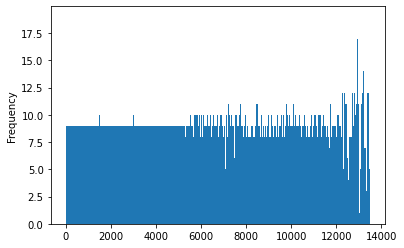

In [6]:
df[df['coingecko_rank'] != 0]['coingecko_rank'].plot(kind='hist', bins=1500)


<AxesSubplot:ylabel='Frequency'>

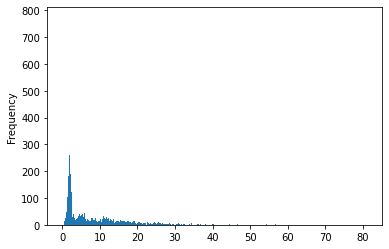

In [7]:
df[df['coingecko_score'] != 0]['coingecko_score'].plot(kind='hist', bins=1500)


<AxesSubplot:ylabel='Frequency'>

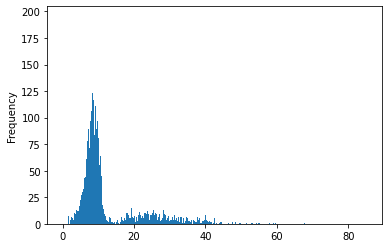

In [8]:
df[df['community_score'] != 0]['community_score'].plot(kind='hist', bins=1500)


<AxesSubplot:ylabel='Frequency'>

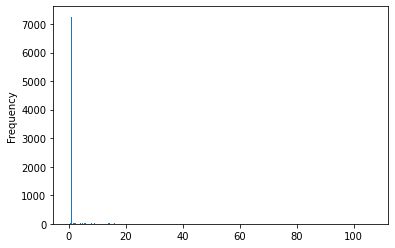

In [9]:
df[df['liquidity_score'] != 0]['liquidity_score'].plot(kind='hist', bins=1500)


<AxesSubplot:ylabel='Frequency'>

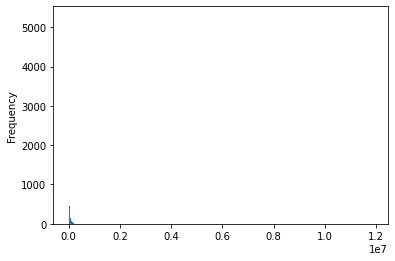

In [10]:
df[df['twitter_followers'] != 0]['twitter_followers'].plot(kind='hist',
                                                           bins=1500)


### Build Pipeline

#### Caso queira customizar alguma função

In [11]:
def multiply(df):
    return pd.DataFrame(df['product_length_cm'] * df['product_height_cm'] *
                        df['product_width_cm'])


volume_computer = Pipeline([('compute_volume', FunctionTransformer(multiply)),
                            ('scale_volume', MinMaxScaler())])

final_preprocessor = ColumnTransformer([
    ('num_encoder', MinMaxScaler(),
     make_column_selector(dtype_include="int64")),
    ('cat_encoder', OneHotEncoder(handle_unknown='ignore', sparse=False),
     make_column_selector(dtype_include="object")),
    ('volume_computer', volume_computer,
     ['product_length_cm', 'product_height_cm', 'product_width_cm'])
])

pipe = Pipeline([('preprocessing', final_preprocessor),
                 ('linear_regression', Ridge())])

pipe

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num_encoder', MinMaxScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fe948dc6c10>),
                                                 ('cat_encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fe948dc6dc0>),
                                                 ('volume_computer',
                                                  Pipeline(steps=[('compute_volume',
                                                                   FunctionTransformer(func=<function multiply at 0x7fe948e761f0>)),
                                                                  ('scale_volume',
                                                                   MinMaxScaler())]),
                                                  ['product_length_cm',
                                                   'product_height_cm',
                                                   'product_width_cm'])])),
                ('linear_regression', Ridge())])

#### Caso use as padrões

In [15]:


final_preprocessor = ColumnTransformer([
    ('num_encoder', MinMaxScaler(),
     make_column_selector(dtype_include="float64")),

    ('cat_encoder', OneHotEncoder(handle_unknown='ignore', sparse=False),
     make_column_selector(dtype_include="object"))])

pipe = Pipeline([('preprocessing', final_preprocessor),
                 ('linear_regression', Ridge())])

pipe

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num_encoder', MinMaxScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fe942e0b1c0>),
                                                 ('cat_encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fe942e0baf0>)])),
                ('linear_regression', Ridge())])

In [16]:
pipe.fit_transform(df)

TypeError: Encoders require their input to be uniformly strings or numbers. Got ['ndarray']